<a href="https://colab.research.google.com/github/nekattrin/Excepcions/blob/master/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключение библиотек и скриптов


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Загрузка данных

In [ ]:
DATASET_PATH = '/train .csv'
df = pd.read_csv(DATASET_PATH)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


Проверка на наличие пропущенных значений

In [ ]:
data = pd.read_csv("/train .csv")
print(data.isnull().sum())

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64


Заполнение пропущенных значений медианными

In [ ]:
data["LifeSquare"].fillna(data["LifeSquare"].median(), inplace=True)
data["Healthcare_1"].fillna(data["Healthcare_1"].median(), inplace=True)

In [ ]:
print(data.isnull().sum())

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64


Вывод типов данных

In [ ]:
data.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

Вывод сводной статистики цены

In [ ]:
data['Price'].describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

Вычисление квантильных значений для определения верхней и нижней границ выбросов

In [ ]:
quantile025 = np.quantile(df['Price'], q=0.025)
quantile025

87244.3837780606

In [ ]:
quantile975 = np.quantile(df['Price'], q=0.975)
quantile975

466741.91314522066

Определение выбросов

In [ ]:
extra = (data["Price"] > quantile975) | (data["Price"] < quantile025)
data[extra]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
10,535,2,3.0,74.199049,44.735889,10.0,5,14.0,2008,0.035145,B,B,42,9292,3,2620.0,0,3,B,512797.373401
14,191,36,3.0,81.994790,43.688798,10.0,2,22.0,2008,0.087619,B,B,8,1497,5,900.0,1,0,B,481360.360728
30,5931,23,1.0,43.033398,32.781260,1.0,3,4.0,1977,0.014073,B,B,2,475,0,900.0,0,0,B,72659.971575
32,3876,100,4.0,104.769022,79.316650,8.0,4,8.0,1960,0.200147,B,B,23,3975,8,770.0,2,0,B,600903.828562
51,12774,157,2.0,62.747509,28.196813,8.0,5,10.0,1956,0.000000,B,B,30,7538,87,4702.0,5,5,B,555661.943969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,872,27,1.0,31.796664,30.229385,10.0,8,22.0,2016,0.211401,B,B,9,1892,0,900.0,0,1,B,86163.846520
9901,671,23,2.0,55.869625,54.177713,10.0,3,17.0,2015,0.005767,B,B,1,388,0,900.0,0,0,B,63900.205590
9937,6149,53,4.0,109.905861,94.268671,20.0,12,24.0,2018,0.049637,B,B,34,7759,0,229.0,1,3,B,492943.252891
9960,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,900.0,1,10,B,524365.550705


Замена выбросов на медиану цен

In [ ]:
data.loc[extra, 'Price'] = data['Price'].median()
data['Price'].describe()

count     10000.000000
mean     208752.045317
std       75457.737650
min       87244.784027
25%      158590.966734
50%      192269.644879
75%      241687.680727
max      466730.805333
Name: Price, dtype: float64

Обработка выбросов значений площади

In [ ]:
quantile025_s = np.quantile(df['Square'], q=0.025)
quantile975_s = np.quantile(df['Square'], q=0.975)
extra = (data["Square"] > quantile975_s) | (data["Square"] < quantile025_s)
data[extra]
data.loc[extra, 'Square'] = data['Square'].median()
data['Square'].describe()


count    10000.000000
mean        55.108606
std         15.215052
min         32.105270
25%         42.432730
50%         52.513445
75%         64.591720
max        100.904263
Name: Square, dtype: float64

Построение гистограммы для изучения целевой переменной

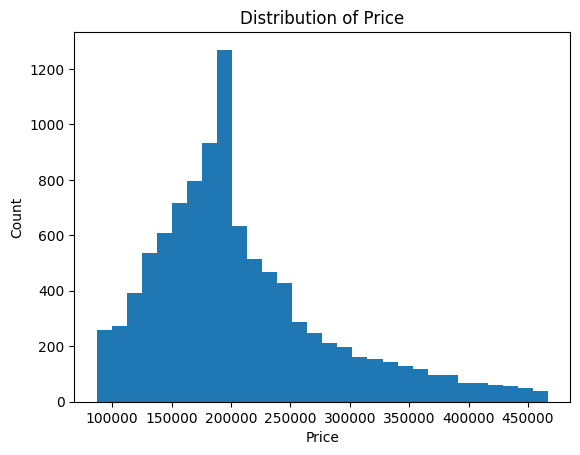

In [ ]:
plt.hist(data['Price'], bins=30)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Price')
data
plt.show()

Построение точечного графига для изучения зависимости цены от площади

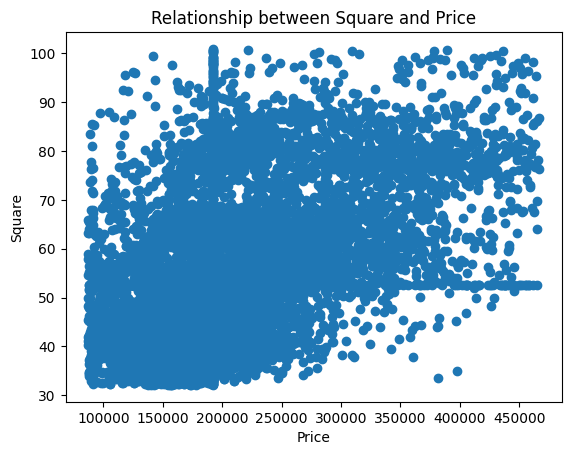

In [ ]:
plt.scatter(data['Price'], data['Square'])
plt.xlabel('Price')
plt.ylabel('Square')
plt.title('Relationship between Square and Price')
plt.show()

Визуализация распределения числовых признаков с помощью гистограмм

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Square'}>,
        <Axes: title={'center': 'LifeSquare'}>],
       [<Axes: title={'center': 'KitchenSquare'}>,
        <Axes: title={'center': 'HouseFloor'}>,
        <Axes: title={'center': 'Ecology_1'}>],
       [<Axes: title={'center': 'Healthcare_1'}>,
        <Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

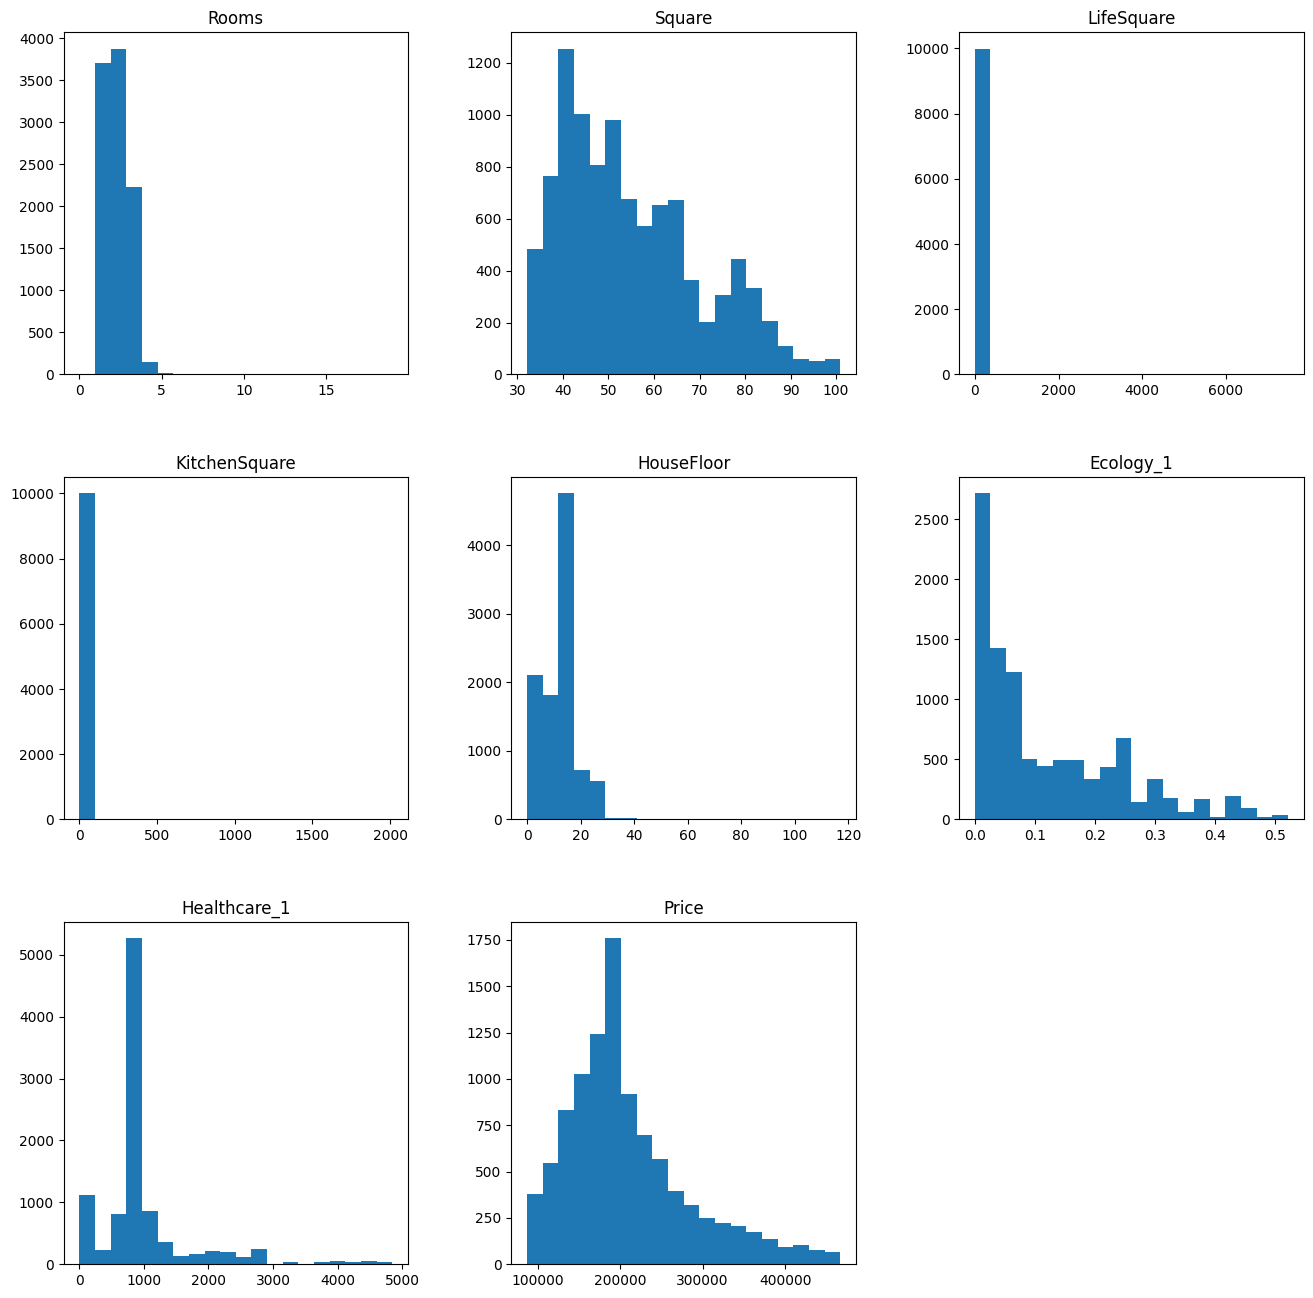

In [ ]:
df_num_features = data.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.hist(figsize=(16,16), bins=20, grid=False)

Распределение жилой площади с помощью BoxPlot

In [ ]:
data['LifeSquare'].describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

Построение графика распределения с помощью BoxPlot

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


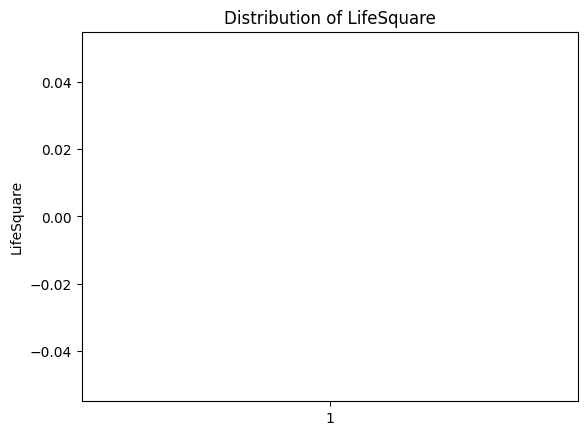

In [ ]:
plt.boxplot(data['LifeSquare'])
plt.ylabel('LifeSquare')
plt.title('Distribution of LifeSquare')
data.head()


Класс DataPipeLine для обработки данных

                 Id   DistrictId        Rooms       Square   LifeSquare  \
count   4457.000000  4457.000000  4457.000000  4457.000000  4457.000000   
mean    8397.987660    63.153691     1.950864    54.902037    35.269683   
std     4853.278023    48.037841     0.825731    21.228331    20.419322   
min        0.000000     0.000000     1.000000     2.596351     0.370619   
25%     4236.000000    21.000000     1.000000    40.941948    22.719419   
50%     8388.000000    54.000000     2.000000    49.830082    32.188586   
75%    12614.000000    99.000000     3.000000    64.323898    44.318628   
max    16798.000000   209.000000    10.000000   641.065193   638.163193   

       KitchenSquare        Floor   HouseFloor     HouseYear    Ecology_1  \
count    4457.000000  4457.000000  4457.000000  4.457000e+03  4457.000000   
mean        7.548351     7.840027    12.098497  6.481446e+03     0.137977   
std        29.700192     4.946594     6.387575  3.003265e+05     0.125042   
min         0.00

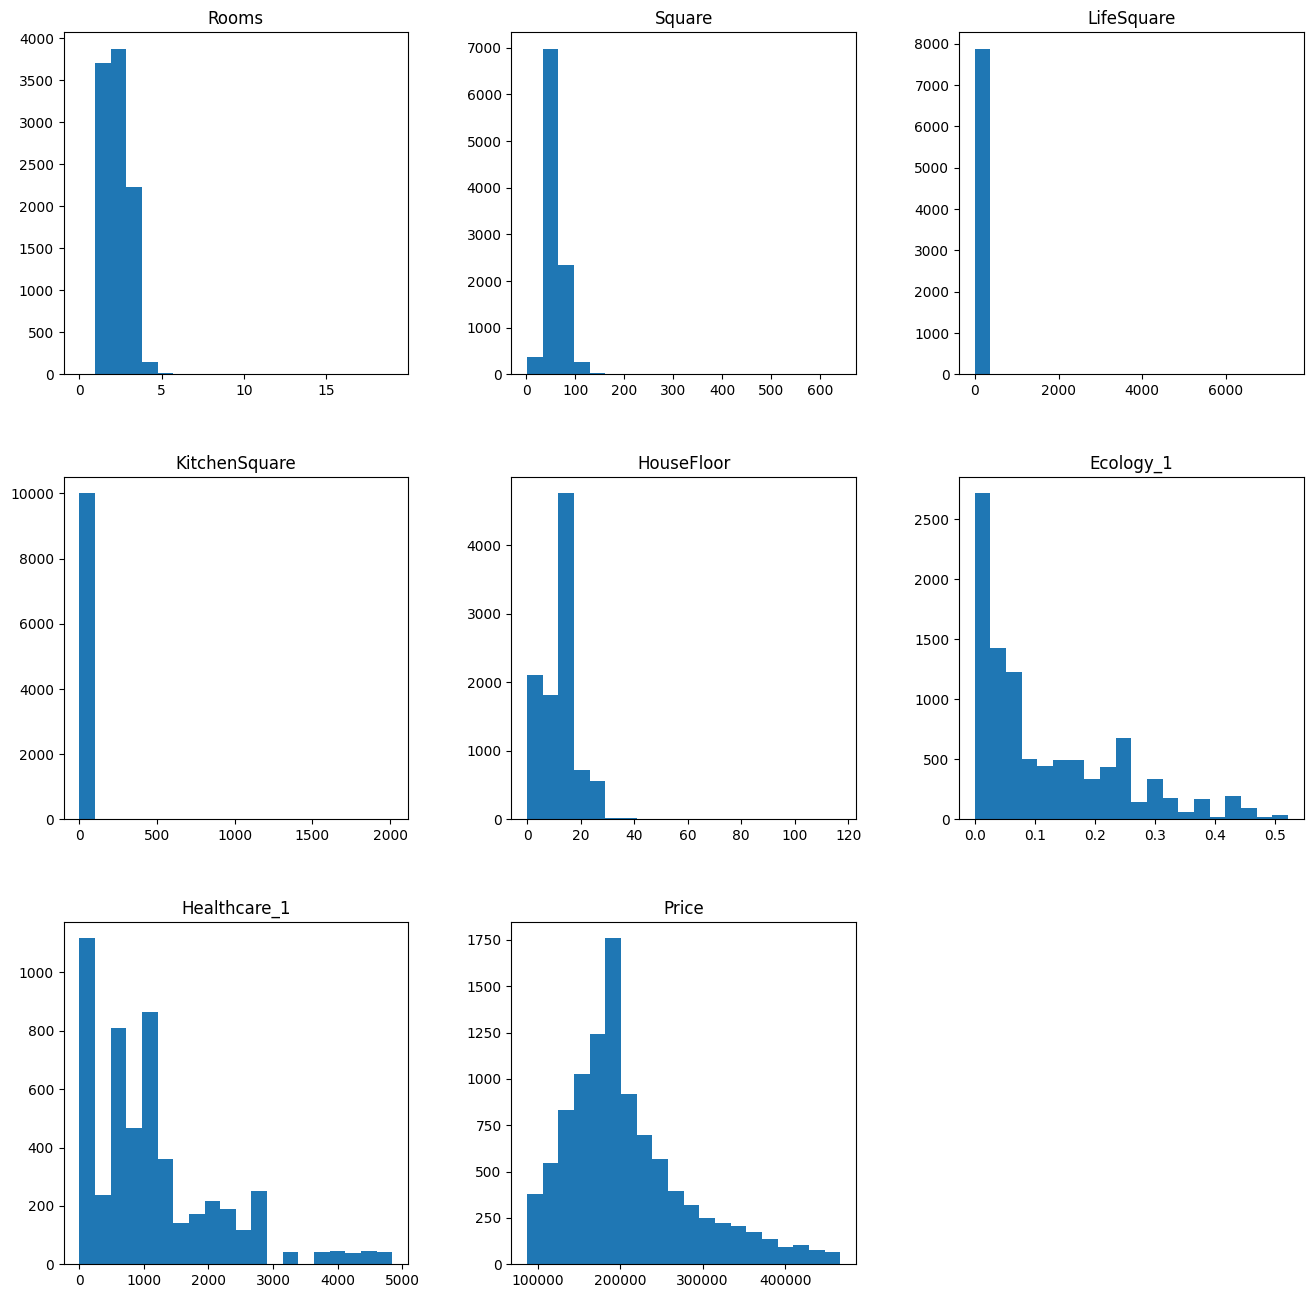

In [33]:
class DataPipeline:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None

    def load_data(self):
        self.data = pd.read_csv(self.file_path)

    def clean_data(self):
        self.data.dropna(inplace=True)
        self.data.reset_index(drop=True, inplace=True)

    def transform_data(self, col):
        quantile025_s = np.quantile(df[col], q=0.025)
        quantile975_s = np.quantile(df[col], q=0.975)
        extra = (data[col] > quantile975_s) | (data[col] < quantile025_s)
        data[extra]
        data.loc[extra, col] = data[col].median()
        data[col].describe()


    def analyze_data(self):
        summary_stats = self.data.describe()
        print(summary_stats)

    def visualize_data(self):
        df_num_features = data.select_dtypes(include=['float64', 'float32', 'float16'])
        df_num_features.hist(figsize=(16,16), bins=20, grid=False)

    def run_pipeline(self):
        self.load_data()
        self.clean_data()
        self.transform_data('Price')
        self.analyze_data()
        self.visualize_data()

# Создаем экземпляр класса DataPipeline
pipeline = DataPipeline('/train .csv')

# Запускаем конвейер обработки данных
pipeline.run_pipeline()